In [1]:
using FunctionalCollections
using Iterators
using Pipe
using Compat

macro printval(ee)
    ee_expr = @sprintf "%s" string(ee)
    esc(:(println($ee_expr," = ", $ee)))
end

macro pz(ee)
    ee_expr = @sprintf "%s" string(ee)
    esc(:(println($ee_expr,"\t\t",typeof($ee), "\t", size($ee))))
end

push!(LOAD_PATH, ".")
push!(LOAD_PATH, "../util/")
using DataStructures
using DataStructuresExtended
using JLD
using DataFrames

In [ ]:
OUTPUT_DIR = "../../documents_prepared/Journal\ Papers/SumResynthesis/data/"

In [ ]:
`git add ../../documents_prepared/Journal\ Papers/SumResynthesis/data/ordering_scores.csv` |> run

In [ ]:
`git push` |> run

In [11]:
function jaccard_index(aa::DataStructures.Accumulator,bb::DataStructures.Accumulator)
    sum(intersect(aa,bb))/sum(union(aa,bb))
end

function jaccard_index(aa,bb)
    length(intersect(aa,bb))/length(union(aa,bb))
end

jaccard_index (generic function with 2 methods)

In [80]:
function precision(actual::DataStructures.Accumulator,reference::DataStructures.Accumulator)
    sum(intersect(actual,reference))/sum(actual)
end
function recall(actual::DataStructures.Accumulator,reference::DataStructures.Accumulator)
    sum(intersect(actual,reference))/sum(reference)
end

recall (generic function with 1 method)

In [56]:
function flatten_blocked_records{T<:AbstractString, V}(records::Dict{T,V})  
    rec_types = @pipe books_glove300eculidean_raw |> values |> map(typeof,_) |> union
    rec_type = length(rec_types)==1 ? rec_types[1] : V
    ret = rec_type() #Construct it, it is some form of vector, or we will error soon
    sizehint!(ret) = sum([length(r) for r in values(records)])
    
    sorted_keys = @pipe records |> keys |> map(k->parse(Int,k),_) |> sort!
    for intkey in sorted_keys
        key = string(intkey)
        push!(ret, records[key]...)
    end
    ret
end

6677-element Array{Tuple{Array{ASCIIString,1},Array{ASCIIString,1},Float32},1}:
 (ASCIIString["``","you","would","destroy","a","book","that","even","the","quran","calls","holy","?","''"],ASCIIString["``","you","holy","would","book","that","a","quran","destroy","calls","the","even","?","''"],-2.5348536f-6)                                                                                                                                                             
 (ASCIIString["im","glad","that","i","left","henderson","."],ASCIIString["i","left","im","that","henderson","glad","."],-1.4708529f-6)                                                                                                                                                                                                                                                         
 (ASCIIString["he","ran","around","the","student","apartments","yelling","fire",",","fire","!"],ASCIIString["fire","fire","he","!","around","ran","apart

In [51]:
tt = @pipe books_glove300eculidean_raw |> values |> map(typeof,_) |> union
tt[1]()

0-element Array{Tuple{Array{ASCIIString,1},Array{ASCIIString,1},Float32},1}

In [61]:

#books_glove300cityblock_raw = load("results/bags/books_corpus_0.001_of_test_glove300_cityblock.jld","4")
books_glove300eculidean_raw = flatten_blocked_records(load("results/bags/books_corpus_0.001_of_test_glove300.jld"))
brown_glove300_raw = load("results/bags/brown_glove300_res.jld", "res")
#brown_glove200_raw = load("results/bags/brown_glove200_res.jld", "res")
#brown_glove100_raw = load("results/bags/brown_glove100_res.jld", "res")
#brown_glove50_raw = load("results/bags/brown_glove50_res.jld", "res")

42004-element Array{Any,1}:
 (ASCIIString["``","only","a","relative","handful","of","such","reports","was","received"  …  "of","voters","and","the","size","of","this","city","''","."],ASCIIString["``","``","of","the","the","``","of","any","the","it"  …  "widespread","meanwhile","include","23-year-old","unavailable",".","city","interest","ran","example"],-8.765093594130139)                             
 (ASCIIString["it","recommended","that","fulton","legislators","act","``","to","have","these"  …  "to","the","end","of","modernizing","and","improving","them","''","."],ASCIIString["law","it","to","``","act","and","of","improve","years","recommended"  …  "they","forcing","''","legislators","analysed","end","there","inspired","these","meanwhile"],-8.498410813644094)         
 (ASCIIString["the","grand","jury","commented","on","a","number","of","other","topics"  …  "inure","to","the","best","interest","of","both","governments","''","."],ASCIIString["we","other","they","other","it","will","t

In [ ]:
@assert all([rset[1] for rset in brown_glove50_raw] .== [rset[1] for rset in brown_glove300_raw])
@assert all([rset[1] for rset in brown_glove50_raw] .== [rset[1] for rset in brown_glove200_raw])
@assert all([rset[1] for rset in brown_glove50_raw] .== [rset[1] for rset in brown_glove100_raw])

In [79]:
books_glove300eculidean_raw[100]

(ASCIIString["a","few","folks","around","here","dont","like","you",",","you","know",",","jake",",","said","the","pastor","."],ASCIIString["you","you","like",",","a","around","said",",","pastor","the","jake","folks",",","here","dont",".","_____________","few","know","."],-2.477263f0)

In [63]:
bag_res = DataFrame()
bag_res[:ground] = [counter(rset[1]) for rset in books_glove300eculidean_raw]
bag_res[:ground_len] = Int[sum(ss) for ss in bag_res[:ground]]
exp_names = ASCIIString[]
for raw_name in ["books_glove300eculidean_raw"]#"brown_glove50_raw","brown_glove100_raw", "brown_glove200_raw", "brown_glove300_raw"]
    colname = split(raw_name,"_")[2] 
    push!(exp_names, colname)
    raw = eval(raw_name|>Symbol)
    bag_res[colname*"_actual"|> Symbol] = [counter(rset[2]) for rset in raw]
    #bag_res[colname*"_distance"|> Symbol] = Float64[-1*rset[3] for rset in raw]
end

bag_res

,ground,ground_len,glove300eculidean_actual
1,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""even""=>1,""``""=>1,""holy""=>1,""would""=>1,""a""=>1,""destroy""=>1,""that""=>1,""?""=>1,""quran""=>1,""you""=>1,""the""=>1,""''""=>1,""book""=>1,""calls""=>1))",14,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""even""=>1,""``""=>1,""holy""=>1,""would""=>1,""a""=>1,""destroy""=>1,""that""=>1,""?""=>1,""quran""=>1,""you""=>1,""the""=>1,""''""=>1,""book""=>1,""calls""=>1))"
2,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""i""=>1,""left""=>1,""henderson""=>1,""that""=>1,""im""=>1,"".""=>1,""glad""=>1))",7,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""left""=>1,""henderson""=>1,""glad""=>1,""that""=>1,""im""=>1,"".""=>1,""i""=>1))"
3,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""ran""=>1,""apartments""=>1,""fire""=>2,"",""=>1,""the""=>1,""!""=>1,""yelling""=>1,""he""=>1,""student""=>1,""around""=>1))",11,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""ran""=>1,""apartments""=>1,""fire""=>2,"",""=>1,""!""=>1,""the""=>1,""yelling""=>1,""he""=>1,""student""=>1,""around""=>1))"
4,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""child""=>1,""a""=>1,""but""=>1,"",""=>1,""dont""=>1,"".""=>1,""i""=>1,""hes""=>1,""him""=>1,""like""=>1,""just""=>1))",11,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""child""=>1,""but""=>1,""a""=>1,"",""=>1,""dont""=>1,"".""=>1,""i""=>1,""hes""=>1,""him""=>1,""like""=>1,""just""=>1))"
5,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""one""=>1,""a""=>1,"",""=>2,""politician""=>1,""that""=>2,""miles""=>1,"".""=>1,""you""=>1,""wont""=>1,""discussion""=>1,""me""=>1,""of""=>1,""trust""=>1,""on""=>1,""within""=>1,""see""=>1,""oh""=>1))",19,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""there""=>1,""one""=>1,""a""=>1,"",""=>2,""politician""=>1,""that""=>1,""it""=>1,""co-founders""=>1,""you""=>2,""about""=>1,""togan""=>1,""travelled""=>1,""respiro""=>1,""of""=>1,""put""=>1,""trust""=>1,""on""=>1,""within""=>1,""see""=>1,""oh""=>1,""____________________________________________""=>1))"
6,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""but""=>1,""had""=>1,""nothing""=>1,"",""=>2,""it""=>1,"".""=>1,""i""=>2,""you""=>1,""said""=>1,""with""=>1,""do""=>1,""to""=>1,""know""=>1,""like""=>1))",16,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""but""=>1,""nothing""=>1,""had""=>1,"",""=>2,""it""=>1,"".""=>1,""i""=>2,""you""=>1,""said""=>1,""with""=>1,""do""=>1,""to""=>1,""know""=>1,""like""=>1))"
7,"DataStructures.Accumulator{ASCIIString,Int64}(Dict("",""=>2,""do""=>1,""please""=>1,""let""=>1,""job""=>1,""mcdermott""=>1,""manny""=>1,""his""=>1,"".""=>1))",10,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""do""=>1,"",""=>2,""please""=>1,""job""=>1,""let""=>1,""mcdermott""=>1,""his""=>1,""manny""=>1,"".""=>1))"
8,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""conventional""=>1,""we""=>2,""thing""=>1,""both""=>1,""was""=>1,""and""=>2,""reasoning""=>1,""beyond""=>1,""that""=>1,""wanted""=>1,""avenues""=>1,"".""=>1,""the""=>2,""learning""=>1,""of""=>1,""only""=>1,""knew""=>1,""to""=>2,""know""=>1,""understand""=>1))",24,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""sebek""=>1,""conventional""=>1,""aka""=>1,""we""=>2,""not""=>1,""thing""=>1,""what""=>1,""gentrys""=>1,""was""=>1,""and""=>2,""reasoning""=>1,""beyond""=>1,""that""=>1,""wanted""=>1,""avenues""=>1,"".""=>1,""importantly""=>1,""the""=>2,""learning""=>1,""of""=>1,""__________________________________""=>1,""two""=>1,""to""=>2,""he""=>1,""____________________________________________""=>1,""understand""=>1))"
9,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""discover""=>1,""outside""=>1,""we""=>1,""one""=>1,""walked""=>1,""island""=>1,"".""=>1,""up""=>1,""lit""=>1,""the""=>2,""end""=>1,""other""=>1,""to""=>2,""from""=>1))",16,"DataStructures.Accumulator{ASCIIString,Int64}(Dict(""discover""=>1,""outside""=>1,""we""=>1,""one""=>1,""walked""=>1,""island""=>1,"".""=>1,""up""=>1,""lit"

In [81]:
for exp_name in exp_names
    actual = bag_res[exp_name*"_actual" |> symbol]
    bag_res[exp_name*"_perfect" |> symbol] = actual.==bag_res[:ground]
    bag_res[exp_name*"_jaccard" |> symbol] = map(jaccard_index, actual, bag_res[:ground])
    bag_res[exp_name*"_precision" |> symbol] = map(precision, actual, bag_res[:ground])
    bag_res[exp_name*"_recall" |> symbol] = map(recall, actual, bag_res[:ground])
end

In [99]:
@pipe (map(string,bag_res.colindex))
                    
                    

LoadError: LoadError: MethodError: `start` has no method matching start(::DataFrames.Index)
while loading In[99], in expression starting on line 1

In [100]:

jaccard_cols = Symbol[exp_name*"_jaccard" |> symbol for exp_name in exp_names]
perfect_cols = Symbol[exp_name*"_perfect" |> symbol for exp_name in exp_names]
keep_cols = @pipe (bag_res.colindex |> keys |> map(string,_)
                    |>filter(col -> contains(col,"jaccard") ||  contains(col,"perfect") ||  contains(col,"recall") ||  contains(col,"precision"),_)
                    |> map(Symbol,_))
len_scores = aggregate(bag_res[[:ground_len, keep_cols...]], :ground_len, mean)
sort!(len_scores)
#writetable(OUTPUT_DIR*"selection_len_scores.csv", len_scores)
len_scores

,ground_len,glove300eculidean_perfect_mean,glove300eculidean_jaccard_mean,glove300eculidean_precision_mean,glove300eculidean_recall_mean
1,1,1.0,1.0,1.0,1.0
2,2,1.0,1.0,1.0,1.0
3,3,1.0,1.0,1.0,1.0
4,4,1.0,1.0,1.0,1.0
5,5,0.9871134020618557,0.9929123711340206,0.9946244477172312,0.9953608247422681
6,6,0.9932279909706546,0.9977426636568849,0.9981188863807374,0.999247554552295
7,7,0.9734299516908212,0.9874731615673644,0.9912870945479642,0.9917184265010351
8,8,0.9558139534883721,0.9831289640591966,0.9882364341085271,0.9906976744186047
9,9,0.9644549763033176,0.9881008407074758,0.9919359471492174,0.993417588204318
10,10,0.905511811023622,0.9716519957835381,0.9790628881180062,0.9868766404199475


In [93]:
[:ground_len, keep_cols...]

5-element Array{Any,1}:
 :ground_len                  
 "glove300eculidean_perfect"  
 "glove300eculidean_jaccard"  
 "glove300eculidean_precision"
 "glove300eculidean_recall"   

In [68]:
cum_len_scores = DataFrame()
cum_len_scores[:max_ground_len] = bag_res[:ground_len] |> unique |> sort!
for jaccard_col in jaccard_cols
    cum_len_scores[jaccard_col] = Float64[ begin
            shortish_sents = bag_res[:ground_len] .<= max_len;
            bag_res[shortish_sents, jaccard_col] |> mean
         end for max_len in cum_len_scores[:max_ground_len]]
end
for perfect_col in perfect_cols
    cum_len_scores[perfect_col] = Float64[ begin
            shortish_sents = bag_res[:ground_len] .<= max_len;
            bag_res[shortish_sents, perfect_col] |> mean
         end for max_len in cum_len_scores[:max_ground_len]]
end
#writetable(OUTPUT_DIR*"selection_cum_len_scores.csv", cum_len_scores)
cum_len_scores 


,max_ground_len,glove300eculidean_jaccard,glove300eculidean_perfect
1,1,1.0,1.0
2,2,1.0,1.0
3,3,1.0,1.0
4,4,1.0,1.0
5,5,0.9976754015215553,0.9957734573119188
6,6,0.9976937269372693,0.995079950799508
7,7,0.9956195533769063,0.990686274509804
8,8,0.9934450783134995,0.9846153846153847
9,9,0.992665248344709,0.9816735822959889
10,10,0.9902191593664608,0.9728078215704247


In [78]:
cum_len_scores[57,:]

,max_ground_len,glove300eculidean_jaccard,glove300eculidean_perfect
1,60,0.8960833873815244,0.7692077280215666


In [69]:
function longform(df::DataFrame, index::Symbol, cols::Vector{Symbol}, new_name::Symbol)
    function subdf(col::Symbol)
        df_sub = df[[index, col]]
        rename!(df_sub, col, new_name)
        df_sub[:label] = col
        df_sub
    end
    vcat([subdf(col) for col in cols]...)
end




longform (generic function with 1 method)

In [70]:
using Gadfly

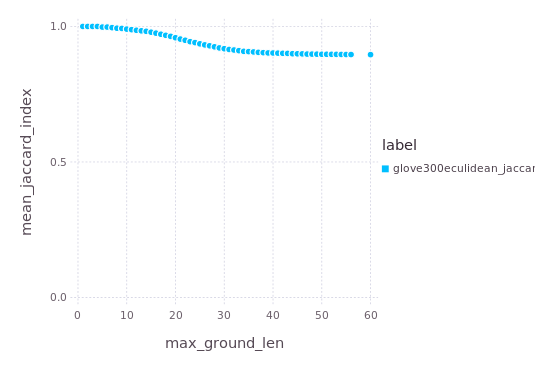

In [71]:
p=Gadfly.plot(longform(cum_len_scores, :max_ground_len, jaccard_cols, :mean_jaccard_index),
    x="max_ground_len", y="mean_jaccard_index",
    color="label",
    Coord.Cartesian(ymin=0),
    Geom.point
)
#draw(PNG("brown_cumulative_length_score.png", 24cm, 6cm), p)

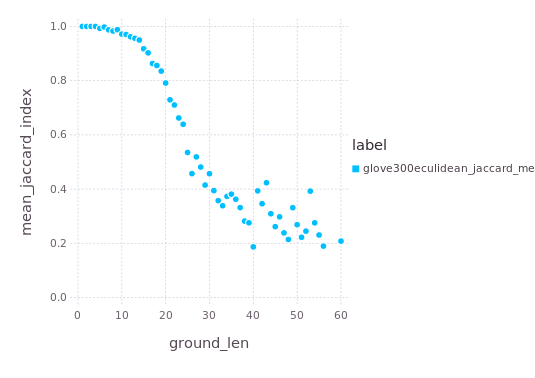

In [72]:

p=Gadfly.plot(longform(len_scores, :ground_len, [string(col)*"_mean"|> Symbol for col in jaccard_cols], :mean_jaccard_index),
    x="ground_len", y="mean_jaccard_index",
    color="label",
    Geom.point
)
#draw(PNG("brown_length_score.png", 24cm, 6cm), p)

Summary Stats:


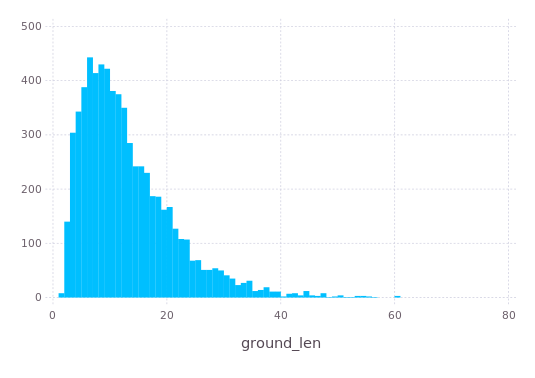

Mean:         12.580201
Minimum:      1.000000
1st Quartile: 7.000000
Median:       11.000000
3rd Quartile: 17.000000
Maximum:      60.000000


In [73]:
bag_res[:ground_len] |> describe 
p=Gadfly.plot(bag_res, x="ground_len",  Geom.histogram)
#draw(PNG("brown_length_dist.png", 24cm, 6cm), p)

In [ ]:
##############################################
# ORDERED
########################################

In [ ]:
using PyCall
@pyimport nltk
@pyimport nltk.align.bleu_score as nltk_bleu

function bleu_score(candidate, reference)
    reference = reference |> collect
    candidate = candidate |> collect
    
    if reference==candidate #Perfect Match
        1.0
    else
        weights = [1,1,1,1]/4
        nltk_bleu.bleu(candidate,Any[reference], weights)
    end
end

In [ ]:
bleu_score(["the","comedy","of","manners","of","this","first","a","basis","is","performed","in","1892","."],
           ["this","is","the" ,"basis","of","a" ,"comedy" ,"of","manners","first","performed","in","1892", "."]
)

In [ ]:
#folds50 = load("results/ordered/brown_glove50_ordered_vA1000.jld")
#folds100 = load("results/ordered/brown_glove100_ordered_vA1000.jld")
#folds200 = load("results/ordered/brown_glove200_ordered_vA1000.jld")
folds300_loglikelyhood_A5000_2 = load("results/ordered/brown_glove300_ordered_vA5000_loglikelyhood_2.jld")
folds300_loglikelyhood_A5000 = load("results/ordered/brown_glove300_ordered_vA5000_loglikelyhood.jld")
#folds300_loglikelyhood_A1000 = load("results/ordered/brown_glove300_ordered_vA1000_loglikelyhood.jld")
#folds300 = load("results/ordered/brown_glove300_ordered_vA1000.jld")
#folds_oracle = load("results/ordered/brown_oracle_ordered_vA1000.jld")\

#folds_oracle_loglikelyhood_A5000 = load("results/ordered/brown_oracle_ordered_vA5000_loglikelyhood.jld")
#folds_oracle_loglikelyhood_A5000_2 = load("results/ordered/brown_oracle_ordered_vA5000_loglikelyhood_2.jld")
#folds_oracle_loglikelyhood_A10000_2 = load("results/ordered/brown_oracle_ordered_vA10000_loglikelyhood_2.jld")
#folds_oracle_loglikelyhood_A1000 = load("results/ordered/brown_oracle_ordered_vA1000_Loglikelyhood.jld")
#all_ordered_exp_folds = Any[folds_oracle, folds_oracle_loglikelyhood,folds300,folds300_loglikelyhood]#[folds50,folds100,folds200,folds300,folds_oracle]
all_ordered_exp_folds=Any[folds300_loglikelyhood_A5000,folds300_loglikelyhood_A5000_2]


In [ ]:
function get_bleu_score(folds)
    bleu_scores = map(keys(folds), values(folds)) do fold_name,res
        fold_bleu_scores = Float64[]
        for (reference, candidate, prob) in res
            push!(fold_bleu_scores, bleu_score(candidate, reference))
        end
        fold_bleu_scores
    end
end

In [ ]:
attempted_only{T}(fold::Vector{T}) = filter(eap->!isnan(eap[3]), fold)
nongiveup_only{T}(fold::Vector{T}) = filter(eap->0<eap[3]<1, fold)
partial_only{T}(fold::Vector{T}) = filter(eap->eap[3]>1, fold)

attempted_only{T}(folds::Vector{Vector{T}}) = map(attempted_only, folds)
nongiveup_only{T}(folds::Vector{Vector{T}}) = map(nongiveup_only, folds)
partial_only{T}(folds::Vector{Vector{T}}) = map(partial_only, folds)

In [ ]:
bleu_scores = map(all_ordered_exp_folds) do folds
    bleu_scores = get_bleu_score(folds);
    map(mean, bleu_scores) |> mean
end

In [ ]:
bleu_scores_no_giveup = map(all_ordered_exp_folds) do folds
    mean([mean([bleu_score(eap[1], eap[2]) for eap in nongiveup_only(attempted_only(fold))]) for fold in values(folds)])
end

In [ ]:
giveups = map(all_ordered_exp_folds) do folds
    mean([mean(Bool[!(0<eap[3]<1) for eap in attempted_only(fold)]) for fold in values(folds)])
end

In [ ]:
exact_matchs = map(all_ordered_exp_folds) do folds
    mean([mean(Bool[eap[1]==eap[2] for eap in attempted_only(fold)]) for fold in values(folds)])
end

In [ ]:
partials = map(all_ordered_exp_folds) do folds
    mean([mean(Bool[eap[3]>1 for eap in attempted_only(fold)]) for fold in values(folds)])
end

In [ ]:
exact_matchs_no_giveup = map(all_ordered_exp_folds) do folds
    mean([mean(Bool[eap[1]==eap[2] for eap in nongiveup_only(attempted_only(fold))]) for fold in values(folds)])
end

In [ ]:
ordering_res = DataFrame(Model=["Oracle", "Oracle_LL", "300d", 300d_LL])#["50d","100d","200d","300d", "Oracle"])
ordering_res[symbol("BLEU Score")]=bleu_scores
ordering_res[symbol("Exact Ordered Matches")]=exact_matchs
ordering_res[symbol("Giveups")]=giveups
ordering_res[symbol("BLEU Score Excluding Giveups")]=bleu_scores_no_giveup
ordering_res[symbol("Exact Ordered Matches Excluding Giveups")]=exact_matchs_no_giveup
#writetable(OUTPUT_DIR*"ordering_scores.csv", ordering_res)
ordering_res

In [ ]:
########

In [ ]:
fold_indexes=load("brown_glove_folds.jld","fold_indexes");

In [ ]:
function fold(data, fold_indexes)
    ret = Dict()
    for (fold_number,fold_iis) in enumerate(fold_indexes)
        ret["fold_$(fold_number)"] = data[fold_iis]
    end
    ret
end

In [ ]:
jaccard_folds_300 = fold(bag_res[:glove300_jaccard], fold_indexes)

In [ ]:
[jaccard_folds_300["fold_6"] bleu_scores300[1]]

In [ ]:
get_bleu_score(folds300,  count_give_ups=true, count_nonattepts=true);